<a href="https://colab.research.google.com/github/Meet200/Machine_Learning-/blob/main/KNN_Fish_Market_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Used :- Fish market by Kaggle
# Basic understanding of dataset 
*   Length1:                  Vertical length in cm
*   Length2:                  Diagonal length in cm
*   Length3:                  Cross length in cm
*   Height:                   Height in cm
*   Width:                    Diagonal width in cm
*   Species:                  Species name of fish
*   Weight:                   Weight of fish in gram

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [ ]:
from google.colab import drive

In [ ]:
# mounting google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Linear regression"

/content/drive/My Drive/Colab Notebooks/Linear regression


In [ ]:
# Exporting data from Drive 
dataset = pd.read_csv("Fish.csv")
print(dataset)
dataset.shape

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


(159, 7)

In [ ]:
dataset.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
# taking Species name in y and all other in x variable
x = dataset.drop(['Species'], axis=1)
y = dataset['Species']


In [ ]:
# spliting data in train and test dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=110) # here 33% dataset will be of testing and 67% will be for training

In [ ]:
'''as we know that KNN use distance (usually Euclidean) in its mathematical steps so inorder to give equal important to each and every feature we have
to normalize/ standerdize our data set which uses euqation z=(feature-mean average)/standard deviation
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# using KNeighborsClassifier from sklearn to classify data with K value = 2,4,6 (at last given comparison of all K results)
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(6, p=6)

In [ ]:
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=6,
                     weights='uniform')

In [ ]:
# printing of classification report
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(classification_report(y_test, knc.predict(X_test)))

              precision    recall  f1-score   support

       Bream       0.92      1.00      0.96        12
      Parkki       1.00      0.83      0.91         6
       Perch       0.65      0.94      0.77        18
        Pike       1.00      1.00      1.00         3
       Roach       0.00      0.00      0.00         6
       Smelt       1.00      1.00      1.00         3
   Whitefish       0.00      0.00      0.00         5

    accuracy                           0.75        53
   macro avg       0.65      0.68      0.66        53
weighted avg       0.66      0.75      0.70        53



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For K=2
             precision    recall  f1-score   support

       Bream       0.92      1.00      0.96        12
      Parkki       1.00      0.83      0.91         6
       Perch       0.57      0.89      0.70        18
        Pike       1.00      1.00      1.00         3
       Roach       0.00      0.00      0.00         6
       Smelt       1.00      0.67      0.80         3
       accuracy = 0.79

For K=4     
                  precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.64      0.95      0.77        19
           3       0.80      1.00      0.89         4
           4       1.00      0.75      0.86         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         3
           accuracy = 0.70

In [ ]:
# confusion matrix for duffrent K 
print(confusion_matrix(y_test, knc.predict(X_test)))

[[12  0  0  0  0  0  0]
 [ 1  5  0  0  0  0  0]
 [ 0  0 17  0  1  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  3  0  2  0  0]]


For k=2


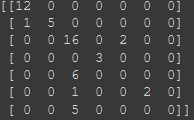


For K=4

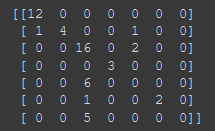

Here as we can see that accuracy for KNN depends on value of K we selected in our model For different value of K=2,4,6 accuracy is 79%,70%,75% so results depend on numbers of neighbours and we can see it is not much Good result as it is not giving good result for species like Whitefish and Roach if we would neglate those features then defenetly accuracy is going to be High.